<a href="https://colab.research.google.com/github/SudhakarKuma/Machine_Learning/blob/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Winning_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle competitions process
---

---
## Explore train data
---
We will work with another Kaggle competition called "Store Item Demand Forecasting Challenge". In this competition, we are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items in 10 different stores.

To begin, let's explore the train data for this competition. For the faster performance, we will work with a subset of the train data containing only a single month history.

Our initial goal is to read the input data and take the first look at it.

In [1]:
# Import pandas
import pandas as pd

# Read train data
train = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


---
## Explore test data
---
Having looked at the train data, let's explore the test data in the "Store Item Demand Forecasting Challenge". Remember, that the test dataset generally contains one column less than the train one.

This column, together with the output format, is presented in the sample submission file. Before making any progress in the competition, you should get familiar with the expected output.

That is why, let's look at the columns of the test dataset and compare it to the train columns. Additionally, let's explore the format of the sample submission. The train DataFrame is available in your workspace.

In [2]:
import pandas as pd

# Read the test data
test = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/demand_forecasting_test.csv')
# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

# Read the sample submission file
sample_submission = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/demand_forecasting_sample_submission.csv')

# Look at the head() of the sample submission
print(sample_submission.head())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']
   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


---
## Train a simple model
---
As you determined, you are dealing with a regression problem. So, now you're ready to build a model for a subsequent submission. But now, instead of building the simplest Linear Regression model as in the slides, let's build an out-of-box Random Forest model.

You will use the `RandomForestRegressor` class from the scikit-learn library.

Your objective is to train a Random Forest model with default parameters on the "store" and "item" features.

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# # Read the train data
# train = pd.read_csv('train.csv')

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

---
## Prepare a submission
---
You've already built a model on the training data from the Kaggle Store Item Demand Forecasting Challenge. Now, it's time to make predictions on the test data and create a submission file in the specified format.

Your goal is to read the test data, make predictions, and save these in the format specified in the "sample_submission.csv" file. The `rf` object you created in the previous exercise is available in your workspace.

Note that starting from now and for the rest of the course, `pandas` library will be always imported for you and could be accessed as `pd`.

In [4]:
# # Read test and sample submission data
# test = pd.read_csv('test.csv')
# sample_submission = pd.read_csv('sample_submission.csv')

# Show the head() of the sample_submission
print(sample_submission.head())

# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


---
## Train XGBoost models
---
Every Machine Learning method could potentially overfit. You will see it on this example with `XGBoost`. Again, you are working with the Store Item Demand Forecasting Challenge. The train DataFrame is available in your workspace.

Firstly, let's train multiple `XGBoost` models with different sets of hyperparameters using `XGBoost`'s learning API. The single hyperparameter you will change is:

* `max_depth` - maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

In [5]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [6]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [7]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

---
## Explore overfitting XGBoost
---
Having trained 3 `XGBoost` models with different maximum depths, you will now evaluate their quality. For this purpose, you will measure the quality of each model on both the train data and the test data. As you know by now, the train data is the data models have been trained on. The test data is the next month sales data that models have never seen before.

The goal of this exercise is to determine whether any of the models trained is overfitting. To measure the quality of the models you will use Mean Squared Error (MSE). It's available in `sklearn.metrics` as `mean_squared_error()` function that takes two arguments: true values and predicted values.

`train` and `test` DataFrames together with 3 models trained (`xg_depth_2`, `xg_depth_8`, `xg_depth_15`) are available in your workspace.

In [8]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))
# the test file is not okay here. 

MSE Train: 331.064. MSE Test: 249.562
MSE Train: 112.057. MSE Test: 30.659
MSE Train: 84.952. MSE Test: 3.545


# Dive into the Competition
---


---
## Define a competition metric
---
Competition metric is used by Kaggle to evaluate your submissions. Moreover, you also need to measure the performance of different models on a local validation set.

For now, your goal is to manually develop a couple of competition metrics in case if they are not available in sklearn.metrics.

In particular, you will define:

* Mean Squared Error (MSE) for the regression problem:

  $MSE = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y_i})^2$
* Logarithmic Loss (LogLoss) for the binary classification problem:
  
  $LogLoss = -\frac{1}{N}\sum_{i=1}^{N} (y_i ln p_i + (1-y_i) ln (1 - p_i))$

In [9]:
import numpy as np

# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Define your own MSE function
def own_mse(y_true, y_pred):
  	# Raise differences to the power of 2
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err

print('Sklearn MSE: {:.5f}. '.format(mean_squared_error(train['sales'], train_pred)))
print('Your MSE: {:.5f}. '.format(own_mse(train['sales'], train_pred)))

Sklearn MSE: 84.95210. 
Your MSE: 84.95187. 


In [10]:
import numpy as np

# Import log_loss from sklearn
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
  	# Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms) 
    return -err

# print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
# print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

---
## EDA statistics
---
As mentioned in the slides, you'll work with New York City taxi fare prediction data. You'll start with finding some basic statistics about the data. Then you'll move forward to plot some dependencies and generate hypotheses on them.

In [11]:
train = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/taxi_train_chapter_4.csv')
test = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/taxi_test_chapter_4.csv')

In [12]:
# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Train head()
print(train.head())

Train shape: (20000, 8)
Test shape: (9914, 7)
   id  fare_amount  ... dropoff_latitude  passenger_count
0   0          4.5  ...        40.712278                1
1   1         16.9  ...        40.782004                1
2   2          5.7  ...        40.750562                2
3   3          7.7  ...        40.758092                1
4   4          5.3  ...        40.783762                1

[5 rows x 8 columns]


In [13]:
# Describe the target variable
print(train.fare_amount.describe())

print('='*40)

# Train distribution of passengers within rides
print(train.passenger_count.value_counts())

count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64
1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: passenger_count, dtype: int64


---
## EDA plots I
---
After generating a couple of basic statistics, it's time to come up with and validate some ideas about the data dependencies. Again, the train DataFrame from the taxi competition is already available in your workspace.

To begin with, let's make a scatterplot plotting the relationship between the fare amount and the distance of the ride. Intuitively, the longer the ride, the higher its price.

To get the distance in kilometers between two geo-coordinates, you will use Haversine distance. Its calculation is available with the haversine_distance() function defined for you. The function expects train DataFrame as input.

In [14]:
def haversine_distance(train):
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

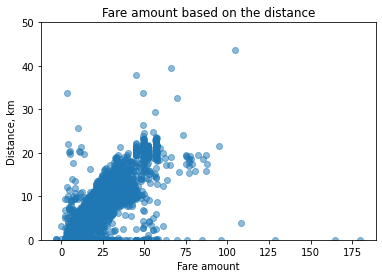

In [15]:
import matplotlib.pyplot as plt

# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

---
## EDA plots II
---
Another idea that comes to mind is that the price of a ride could change during the day.

Your goal is to plot the median fare amount for each hour of the day as a simple line plot. The hour feature is calculated for you. Don't worry if you do not know how to work with the date features. We will explore them in the chapter on Feature Engineering.

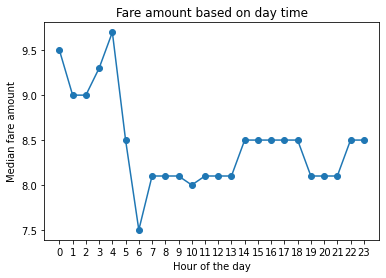

In [16]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

# Feature Engineering 
---

---
## Arithmetical features
---
To practice creating new features, you will be working with a subsample from the Kaggle competition called "House Prices: Advanced Regression Techniques". The goal of this competition is to predict the price of the house based on its properties. It's a regression problem with Root Mean Squared Error as an evaluation metric.

Your goal is to create new features and determine whether they improve your validation score. To get the validation score from 5-fold cross-validation, you're given the `get_kfold_rmse()` function. Use it with the train DataFrame, available in your workspace, as an argument.

In [17]:
train = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/house_prices_train.csv')
train.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,8450,7,2003,Gable,856,Y,856,854,2,1,3,1,8,2,548,208500
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,0,3,1,6,2,460,181500
2,3,11250,7,2001,Gable,920,Y,920,866,2,1,3,1,6,2,608,223500
3,4,9550,7,1915,Gable,756,Y,961,756,1,0,3,1,7,3,642,140000
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,1,4,1,9,3,836,250000


In [18]:
# Import KFold
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

def get_kfold_rmse(train):
    mse_scores = []

    for train_index, test_index in kf.split(train):
        train = train.fillna(0)
        feats = [x for x in train.columns if x not in ['Id', 'SalePrice', 'RoofStyle', 'CentralAir']]
        
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[feats], y=fold_train['SalePrice'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[feats])
    
        fold_score = mean_squared_error(fold_test['SalePrice'], pred)
        mse_scores.append(np.sqrt(fold_score))
        
    return round(np.mean(mse_scores) + np.std(mse_scores), 2)

In [19]:
# Look at the initial RMSE
print('RMSE before feature engineering:', get_kfold_rmse(train))

# Find the total area of the house
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
print('RMSE with total area:', get_kfold_rmse(train))

# Find the area of the garden
train['GardenArea'] = train['LotArea'] - train['1stFlrSF']
print('RMSE with garden area:', get_kfold_rmse(train))

# Find total number of bathrooms
train['TotalBath'] = train['FullBath'] + train['HalfBath']
print('RMSE with number of bathrooms:', get_kfold_rmse(train))

RMSE before feature engineering: 35202.91
RMSE with total area: 33569.72
RMSE with garden area: 33745.65
RMSE with number of bathrooms: 34847.87


---
## Label encoding
---
Let's work on categorical variables encoding. You will again work with a subsample from the House Prices Kaggle competition.

Your objective is to encode categorical features "RoofStyle" and "CentralAir" using label encoding. The train and test DataFrames are already available in your workspace.

In [20]:
test = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/house_prices_test.csv')
test.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea
0,1461,11622,5,1961,Gable,882.0,Y,896,0,1,0,2,1,5,1.0,730.0
1,1462,14267,6,1958,Hip,1329.0,Y,1329,0,1,1,3,1,6,1.0,312.0
2,1463,13830,5,1997,Gable,928.0,Y,928,701,2,1,3,1,6,2.0,482.0
3,1464,9978,6,1998,Gable,926.0,Y,926,678,2,1,3,1,7,2.0,470.0
4,1465,5005,8,1992,Gable,1280.0,Y,1280,0,2,0,2,1,5,2.0,506.0


In [21]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create new features
houses['RoofStyle_enc'] = le.fit_transform(houses['RoofStyle'])
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Look at new features
print(houses[['RoofStyle', 'RoofStyle_enc', 'CentralAir', 'CentralAir_enc']].head())

# All right! You can see that categorical variables have been label encoded. 
# However, as you already know, label encoder is not always a good choice for categorical variables. 
# Let's go further and apply One-Hot encoding.

  RoofStyle  RoofStyle_enc CentralAir  CentralAir_enc
0     Gable              1          Y               1
1     Gable              1          Y               1
2     Gable              1          Y               1
3     Gable              1          Y               1
4     Gable              1          Y               1


---
## One-Hot encoding
---
The problem with label encoding is that it implicitly assumes that there is a ranking dependency between the categories. So, let's change the encoding method for the features "RoofStyle" and "CentralAir" to one-hot encoding. Again, the train and test DataFrames from House Prices Kaggle competition are already available in your workspace.

Recall that if you're dealing with binary features (categorical features with only two categories) it is suggested to apply label encoder only.

Your goal is to determine which of the mentioned features is not binary, and to apply one-hot encoding only to this one.

In [22]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Look at feature distributions
print(houses['RoofStyle'].value_counts(), '\n')
print(houses['CentralAir'].value_counts())

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64 

Y    2723
N     196
Name: CentralAir, dtype: int64


In [23]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encode binary 'CentralAir' feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Create One-Hot encoded features
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
print(houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3))

  RoofStyle  RoofStyle_Flat  ...  RoofStyle_Mansard  RoofStyle_Shed
0     Gable               0  ...                  0               0
1     Gable               0  ...                  0               0
2     Gable               0  ...                  0               0

[3 rows x 7 columns]


# Modeling
---

---
## Replicate validation score
---
You've seen both validation and Public Leaderboard scores in the video. However, the code examples are available only for the test data. To get the validation scores you have to repeat the same process on the holdout set.

Throughout this chapter, you will work with New York City Taxi competition data. The problem is to predict the fare amount for a taxi ride in New York City. The competition metric is the root mean squared error.

The first goal is to evaluate the Baseline model on the validation data. You will replicate the simplest Baseline based on the mean of "fare_amount". Recall that as a validation strategy we used a 30% holdout split with validation_train as train and validation_test as holdout DataFrames. Both of them are available in your workspace.

In [24]:
taxi_train = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/taxi_train_chapter_4.csv')
taxi_test = pd.read_csv('https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/DataCamp/DataCamp_Notes/Machine-Learning-Scientist-with-Python/23_Winning-a-Kaggle-Competition-in-Python/Datasets/taxi_test_chapter_4.csv')

In [25]:
from sklearn.model_selection import train_test_split

# Create local validation
validation_train, validation_test = train_test_split(taxi_train, test_size=0.3, random_state=123)

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean fare_amount on the validation_train data
naive_prediction = np.mean(validation_train['fare_amount'])

# Assign naive prediction to all the holdout observations
validation_test['pred'] = naive_prediction

# Measure the local RMSE
rmse = sqrt(mean_squared_error(validation_test['fare_amount'], validation_test['pred']))
print('Validation RMSE for Baseline I model: {:.3f}'.format(rmse))

Validation RMSE for Baseline I model: 9.986


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
